In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akilsurya.s/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Preparation, Tokenization, Stopwords REmoval and stemming

In [8]:
import re
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string


In [9]:
# I think this will create a dictionary of words from 'a'to 'z'
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ')if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [22]:
data['review'] = data['review'].apply(clean)

In [24]:
#pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 94.9 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


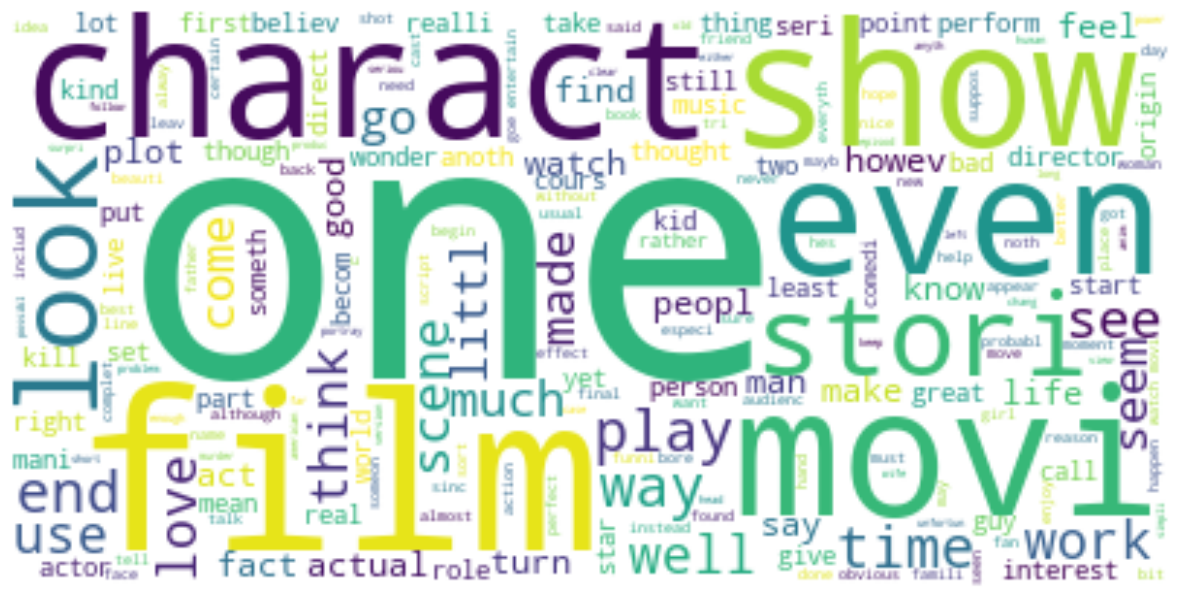

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text Vectorization
* Transform all the text tokens into *numerical vectors*

In [26]:
x = np.array(data['review'])
y = np.array(data['sentiment'])

cv = CountVectorizer() #Convert a collection of text documents to a matrix of token counts.

X = cv.fit_transform(x)

# Split the data into training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state=42)

# Text Classification

* The final step of this NLP process is to classify or cluster texts. 
* Since we're working on the problem of sentiment classification, we will now train a text classification model.
* Here's how to prepare a text classification model for sentiment classification;

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

# Testing the model by giving a random input

In [29]:
user = input('Enter a Text: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Sura is the best or worst movie I've ever seen!
['negative']


# Summary

->While working on any problem of NLP, we first need to:
    
    
    *1. Find a textual dataset
    2. Then prepare the dataset by tokenization, stopwords removal, and stemming
    3. Then perform text vectorization
    4. Last step is text classification or clustering*